# libraries

In [1]:
# data processing
import pandas as pd
import torch

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# EEG signals

## preprocessing

In [2]:
data_Dinh = torch.load('data/data_Dinh_fs200.pt')
data_Dinh.shape

torch.Size([189, 65, 55000])

In [3]:
data_Heitmann = torch.load('data/data_Heitmann_fs200.pt')
data_Heitmann.shape

torch.Size([41, 65, 55000])

In [4]:
eeg_data = torch.cat((data_Dinh, data_Heitmann))
eeg_data.shape

torch.Size([230, 65, 55000])

In [5]:
labels_Dinh = torch.load('data/labels_Dinh_fs200.pt')
print(labels_Dinh.shape)
labels_Dinh

torch.Size([189])


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [6]:
labels_Heitmann = torch.load('data/labels_Heitmann_fs200.pt')
print(labels_Heitmann.shape)
labels_Heitmann

torch.Size([41])


tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1,
        3, 1, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 3, 2, 3, 3, 3])

In [7]:
eeg_labels = torch.cat((labels_Dinh, labels_Heitmann))
eeg_labels.shape

torch.Size([230])

## EDA

In [8]:
def plot_eeg_data(patient, channels):
    assert isinstance(channels, list)
    total_channels = len(channels)
    fig, axs = plt.subplots(total_channels, sharex=True, figsize=(20, total_channels))
    if total_channels == 1:
        axs.plot(eeg_data[patient][channels[0],:])
    else:
        for i in range(total_channels):
            axs[i].plot(eeg_data[patient][channels[i],:])
            axs[i].set_ylabel(f'EEG {channels[i]}')

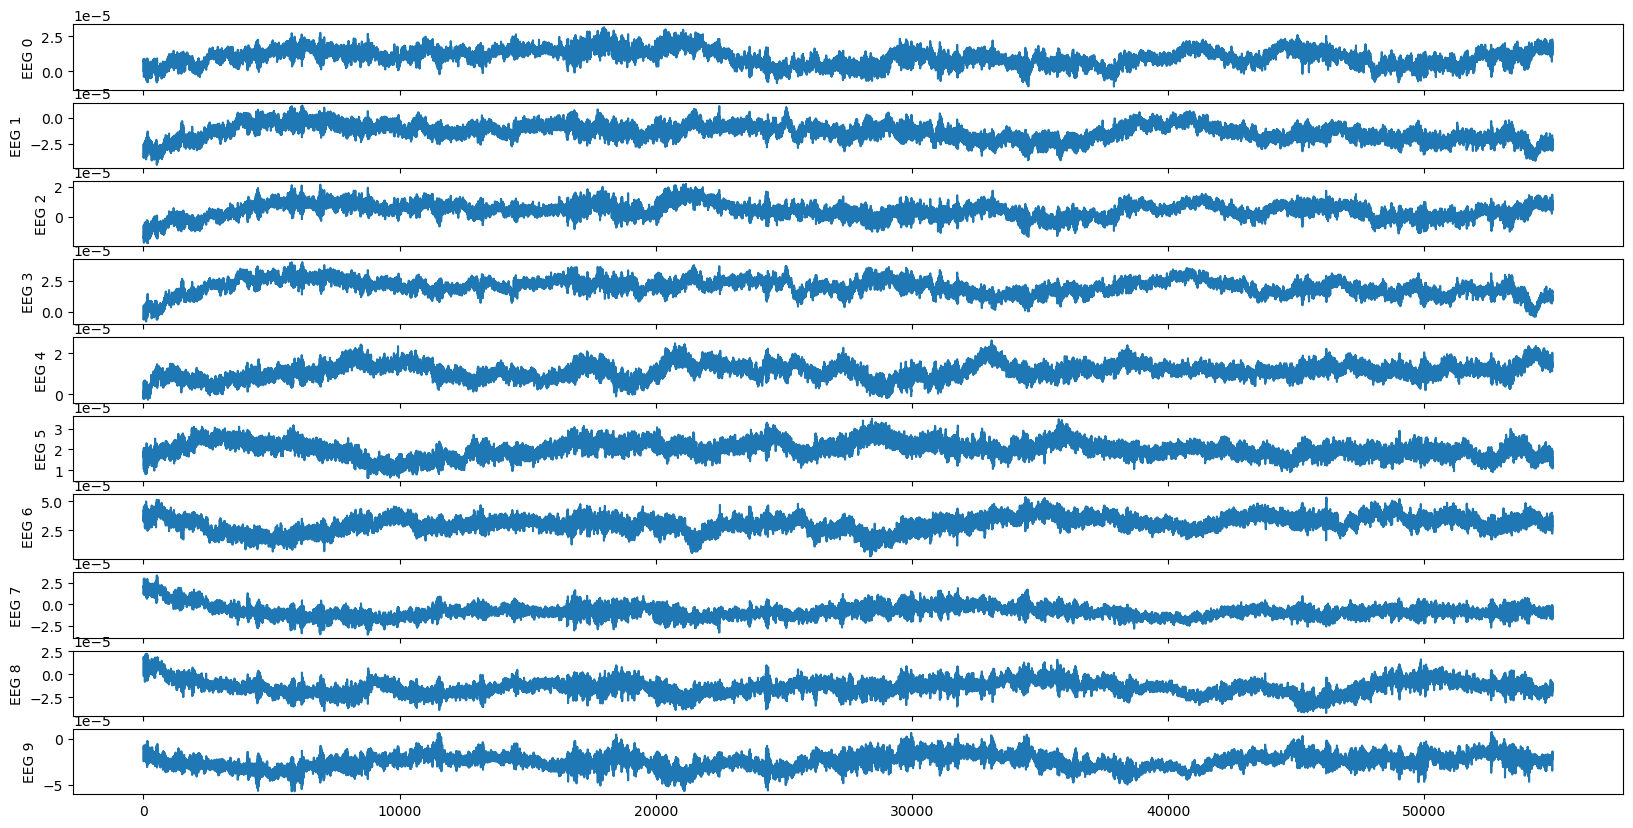

In [9]:
patient = 30
channels = list(range(0, 10))
plot_eeg_data(patient, channels)

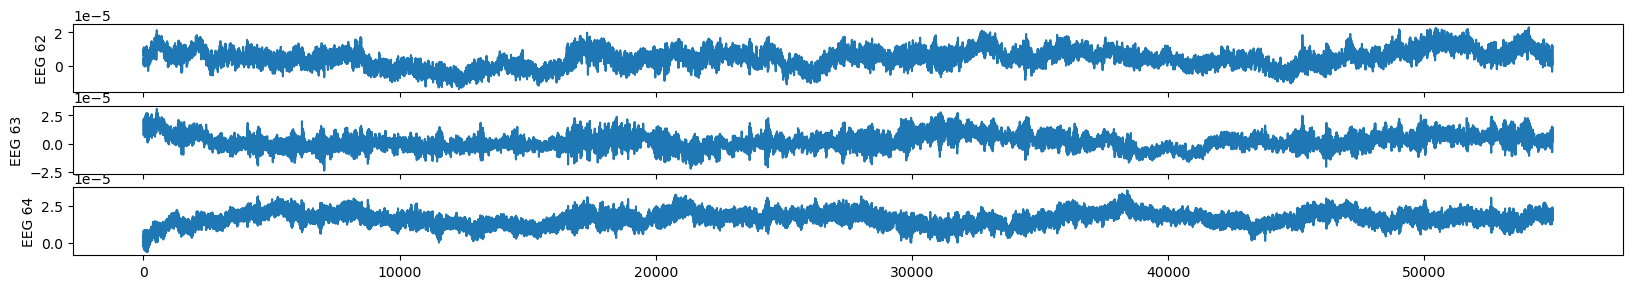

In [10]:
patient = 30
channels = [62,63,64]
plot_eeg_data(patient, channels)

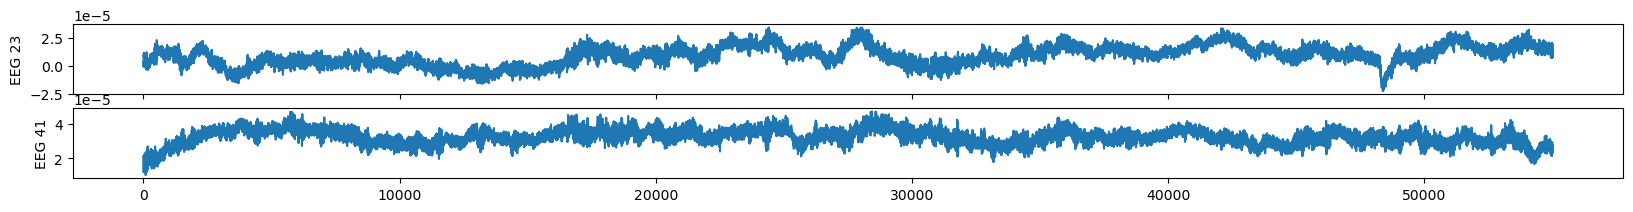

In [11]:
patient = 30
channels = [23, 41]
plot_eeg_data(patient, channels)

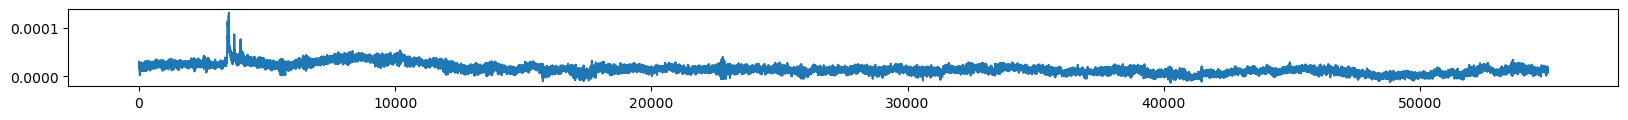

In [12]:
patient = 100
channels = [50]
plot_eeg_data(patient, channels)

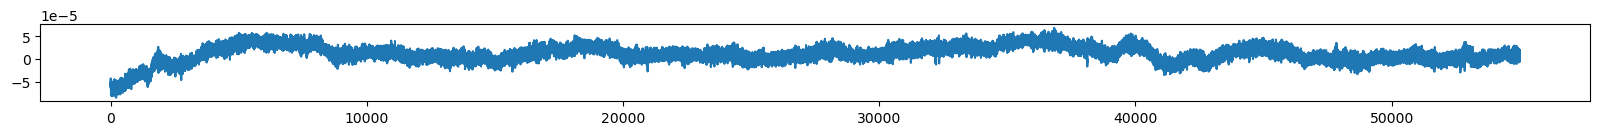

In [13]:
patient = 220
channels = [18]
plot_eeg_data(patient, channels)

# tabular data

classes
* 0 - healthy 
* 1 - chronic_back_pain
* 2 - Fibromyalgia (chronic widespread pain)
* 3 - various (joint pain + nonspecific neuropathic pain + postherpetic neuralgia + polyneuropathic pain)
 
demographic information
* age → years
* sex → f, m  

disease relevant information
* pain duration → months
* average pain intensity → 0-10
* current pain intensity → 0-10
* BDI (Beck Depression Inventory)
* PDQ (painDETECT)
* MQS (medication quantification scale)
* VR-12 PCS (veteran’s RAND 12 physical component score)
* VR-12 MCS (veteran’s RAND 12 mental component score)
* PDI (pain disability index)

## preprocessing

In [14]:
tabular_Dinh = pd.read_excel('data/tabular_Dinh.xlsx')
print(tabular_Dinh.shape)
tabular_Dinh.sample(5)

(189, 14)


,Subject ID,Project prefix,Label,Age\n(years),Sex (m/f),Pain duration\n(months),Avg. pain\nIntensity \n(0 – 10),Curr. Pain \nIntensity\n(0 – 10),BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
184,184,various,3,18,f,16.0,6.0,4.0,14.0,20.0,0.0,29.001243,49.099452,37.0
143,143,various,3,48,f,108.0,4.0,3.0,13.0,28.0,15.4,14.577553,60.502458,28.0
110,110,chronic_back_pain,1,39,f,144.0,2.0,4.0,12.0,22.0,0.0,NaN,NaN,NaN
62,62,healthy,0,52,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,34,healthy,0,76,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
tabular_Dinh.rename({
    'Project prefix': 'class',
    'Label': 'label',
    'Age\n(years)': 'age',
    'Sex (m/f)': 'sex',
    'Pain duration\n(months)': 'pain_duration',
    'Avg. pain\nIntensity \n(0 – 10)': 'avg_pain_intensity',
    'Curr. Pain \nIntensity\n(0 – 10)': 'curr_pain_intensity',
}, axis=1, inplace=True)
tabular_Dinh.drop(['Subject ID'], axis=1, inplace=True)

In [16]:
tabular_Dinh['class'].unique()

array(['healthy', 'chronic_back_pain', 'Fibromyalgia', 'various'],
      dtype=object)

In [17]:
tabular_Dinh['class'].value_counts()

healthy              88
various              47
chronic_back_pain    34
Fibromyalgia         20
Name: class, dtype: int64

In [18]:
tabular_Dinh.sample(5)

,class,label,age,sex,pain_duration,avg_pain_intensity,curr_pain_intensity,BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
68,healthy,0,60,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,chronic_back_pain,1,55,f,240.0,6.0,5.0,31.0,11.0,7.60,NaN,NaN,NaN
145,various,3,57,m,84.0,7.5,8.0,15.0,32.0,22.35,9.448495,64.297687,59.0
66,healthy,0,43,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,healthy,0,48,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
tabular_Heitmann = pd.read_excel('data/tabular_Heitmann.xlsx')
print(tabular_Heitmann.shape)
tabular_Heitmann.sample(5)

(41, 14)


,Subject ID,Project prefix,Label,Age (years),Sex (m/f),Pain duration (month),Avg. pain intensity (0-10),Curr. pain intensity (0-10),BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
2,2,chronic_back_pain,1,72,f,36.0,6,NaN,20,NaN,0.0,NaN,NaN,5.71
15,15,chronic_back_pain,1,58,f,19.0,7,NaN,24,NaN,12.4,NaN,NaN,5.57
4,4,chronic_back_pain,1,53,f,240.0,8,NaN,18,NaN,9.8,NaN,NaN,5.14
17,17,various,3,59,f,60.0,5,NaN,13,NaN,8.6,NaN,NaN,3.86
35,35,chronic_back_pain,1,77,f,30.0,5,NaN,14,NaN,21.9,NaN,NaN,3.00


In [20]:
tabular_Heitmann.columns

Index(['Subject ID', 'Project prefix', 'Label', 'Age (years)', 'Sex (m/f)',
       'Pain duration (month)', 'Avg. pain intensity (0-10)',
       'Curr. pain intensity (0-10)', 'BDI', 'PDQ', 'MQS', 'VR-12 PCS',
       'VR-12 MCS', 'PDI'],
      dtype='object')

In [21]:
tabular_Heitmann.rename({
    'Project prefix': 'class',
    'Label': 'label',
    'Age (years)': 'age',
    'Sex (m/f)': 'sex',
    'Pain duration (month)': 'pain_duration',
    'Avg. pain intensity (0-10)': 'avg_pain_intensity',
    'Curr. pain intensity (0-10)': 'curr_pain_intensity',
}, axis=1, inplace=True)
tabular_Heitmann.drop(['Subject ID'], axis=1, inplace=True)

In [22]:
tabular_Heitmann.sample(5)

,class,label,age,sex,pain_duration,avg_pain_intensity,curr_pain_intensity,BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
0,chronic_back_pain,1,53,f,120.0,3,NaN,22,NaN,3.8,NaN,NaN,3.86
6,chronic_back_pain,1,44,m,NaN,7,NaN,17,NaN,20.8,NaN,NaN,3.86
33,Fibromyalgia,2,29,f,72.0,3,NaN,23,NaN,0.0,NaN,NaN,5.14
40,various,3,22,f,48.0,7,NaN,9,NaN,3.8,NaN,NaN,3.29
29,chronic_back_pain,1,73,f,240.0,5,NaN,6,NaN,11.2,NaN,NaN,1.86


In [23]:
tabular_Heitmann['class'].unique()

array(['chronic_back_pain', 'various', 'Fibromyalgia'], dtype=object)

In [24]:
tabular_Heitmann['class'].value_counts()

chronic_back_pain    26
various              12
Fibromyalgia          3
Name: class, dtype: int64

In [25]:
df = pd.concat([tabular_Dinh, tabular_Heitmann], ignore_index=True)
df

,class,label,age,sex,pain_duration,avg_pain_intensity,curr_pain_intensity,BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
0,healthy,0,66,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,healthy,0,36,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,healthy,0,51,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,healthy,0,51,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,healthy,0,25,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,various,3,48,f,124.0,6.0,NaN,18.0,NaN,14.4,NaN,NaN,6.57
226,Fibromyalgia,2,50,m,10.0,7.0,NaN,9.0,NaN,3.8,NaN,NaN,5.86
227,various,3,38,f,18.0,4.0,NaN,21.0,NaN,1.7,NaN,NaN,4.43
228,various,3,36,f,48.0,2.0,NaN,3.0,NaN,2.2,NaN,NaN,3.71


In [26]:
df.columns

Index(['class', 'label', 'age', 'sex', 'pain_duration', 'avg_pain_intensity',
       'curr_pain_intensity', 'BDI', 'PDQ', 'MQS', 'VR-12 PCS', 'VR-12 MCS',
       'PDI'],
      dtype='object')

## EDA

In [27]:
df.shape

(230, 13)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                230 non-null    object 
 1   label                230 non-null    int64  
 2   age                  230 non-null    int64  
 3   sex                  230 non-null    object 
 4   pain_duration        120 non-null    float64
 5   avg_pain_intensity   121 non-null    float64
 6   curr_pain_intensity  100 non-null    float64
 7   BDI                  141 non-null    float64
 8   PDQ                  80 non-null     float64
 9   MQS                  142 non-null    float64
 10  VR-12 PCS            46 non-null     float64
 11  VR-12 MCS            46 non-null     float64
 12  PDI                  87 non-null     float64
dtypes: float64(9), int64(2), object(2)
memory usage: 23.5+ KB


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,230.0,1.230435,1.209112,0.000000,0.000000,1.000000,3.000000,3.000000
age,230.0,56.708696,14.718832,18.000000,47.000000,57.000000,69.750000,86.000000
pain_duration,120.0,115.158333,105.778188,7.000000,36.000000,72.000000,180.000000,480.000000
avg_pain_intensity,121.0,5.564463,1.660916,2.000000,4.000000,6.000000,7.000000,9.000000
curr_pain_intensity,100.0,5.234000,1.913599,0.500000,4.000000,5.000000,6.850000,9.000000
BDI,141.0,15.719858,8.731791,0.000000,10.000000,15.000000,22.000000,42.000000
PDQ,80.0,17.431250,6.454683,4.000000,12.750000,18.000000,22.000000,32.000000
MQS,142.0,8.303873,7.370785,0.000000,3.400000,7.050000,11.975000,31.900000
VR-12 PCS,46.0,31.773643,7.787758,9.448495,27.609809,31.034908,36.620276,47.612678
VR-12 MCS,46.0,46.449620,11.959153,17.055158,38.369104,46.192842,56.314990,69.198832


### missing values

In [30]:
# sum of missing values
df.isnull().sum()

class                    0
label                    0
age                      0
sex                      0
pain_duration          110
avg_pain_intensity     109
curr_pain_intensity    130
BDI                     89
PDQ                    150
MQS                     88
VR-12 PCS              184
VR-12 MCS              184
PDI                    143
dtype: int64

In [31]:
# percentage of missing values
df.isnull().mean()

class                  0.000000
label                  0.000000
age                    0.000000
sex                    0.000000
pain_duration          0.478261
avg_pain_intensity     0.473913
curr_pain_intensity    0.565217
BDI                    0.386957
PDQ                    0.652174
MQS                    0.382609
VR-12 PCS              0.800000
VR-12 MCS              0.800000
PDI                    0.621739
dtype: float64

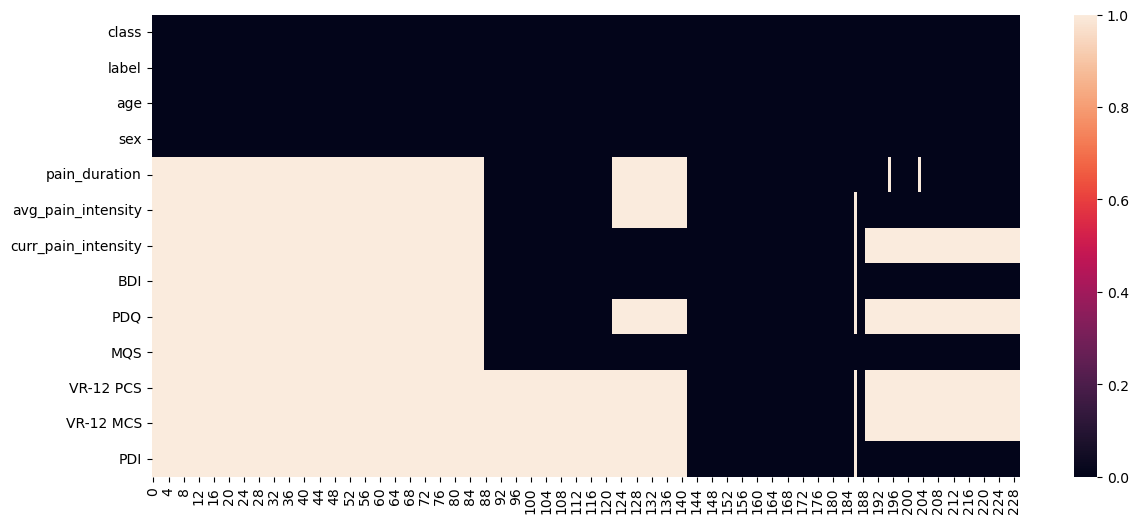

In [32]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull().T)
plt.show()

### stats

In [33]:
feats = ['age', 'sex', 'pain_duration', 'avg_pain_intensity',
       'curr_pain_intensity', 'BDI', 'PDQ', 'MQS', 'VR-12 PCS', 'VR-12 MCS',
       'PDI']
df[feats].describe()

,age,pain_duration,avg_pain_intensity,curr_pain_intensity,BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
count,230.000000,120.000000,121.000000,100.000000,141.000000,80.000000,142.000000,46.000000,46.000000,87.000000
mean,56.708696,115.158333,5.564463,5.234000,15.719858,17.431250,8.303873,31.773643,46.449620,16.481034
std,14.718832,105.778188,1.660916,1.913599,8.731791,6.454683,7.370785,7.787758,11.959153,15.554293
min,18.000000,7.000000,2.000000,0.500000,0.000000,4.000000,0.000000,9.448495,17.055158,0.000000
25%,47.000000,36.000000,4.000000,4.000000,10.000000,12.750000,3.400000,27.609809,38.369104,4.430000
50%,57.000000,72.000000,6.000000,5.000000,15.000000,18.000000,7.050000,31.034908,46.192842,7.000000
75%,69.750000,180.000000,7.000000,6.850000,22.000000,22.000000,11.975000,36.620276,56.314990,29.000000
max,86.000000,480.000000,9.000000,9.000000,42.000000,32.000000,31.900000,47.612678,69.198832,59.000000


### class distribution

In [34]:
df['class'].value_counts()

healthy              88
chronic_back_pain    60
various              59
Fibromyalgia         23
Name: class, dtype: int64

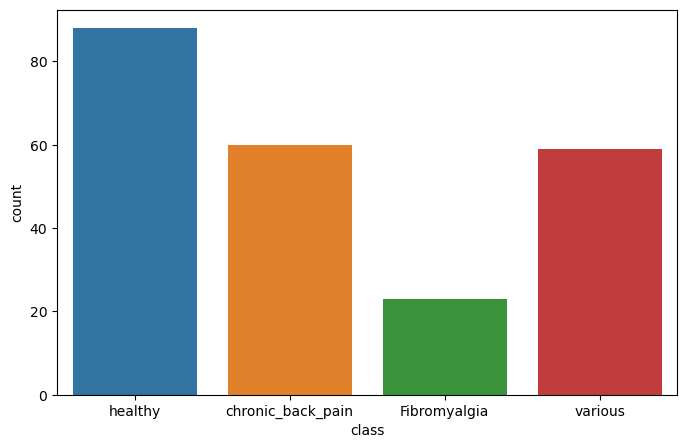

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(x='class', data=df)
plt.show()

### sex distribution

In [36]:
df['sex'].value_counts()

f    154
m     76
Name: sex, dtype: int64

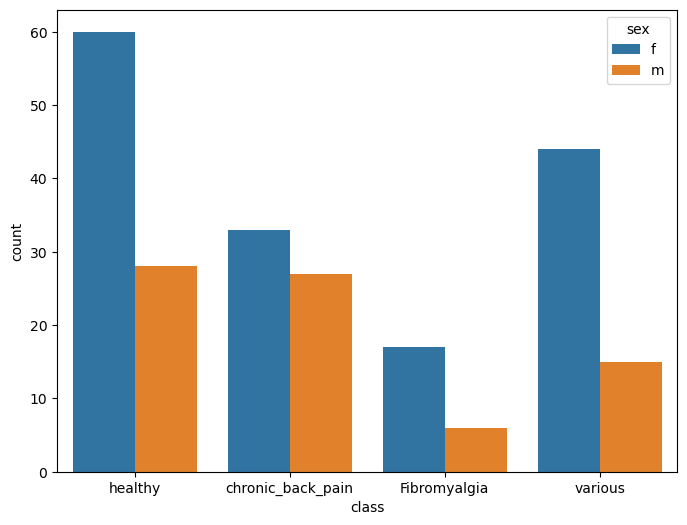

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(x='class', data=df, hue='sex')
plt.show()

### age distribution

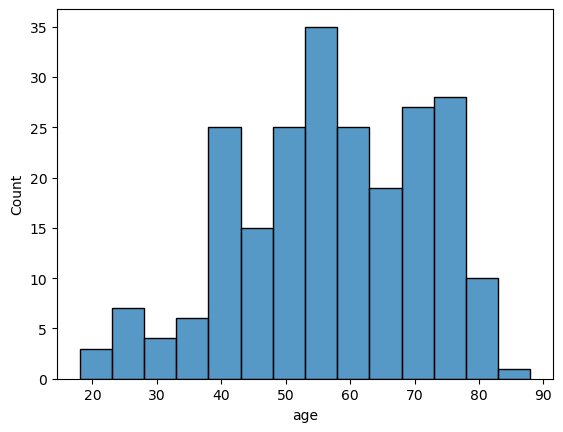

In [38]:
sns.histplot(x='age',data=df, binwidth=5)
plt.show()

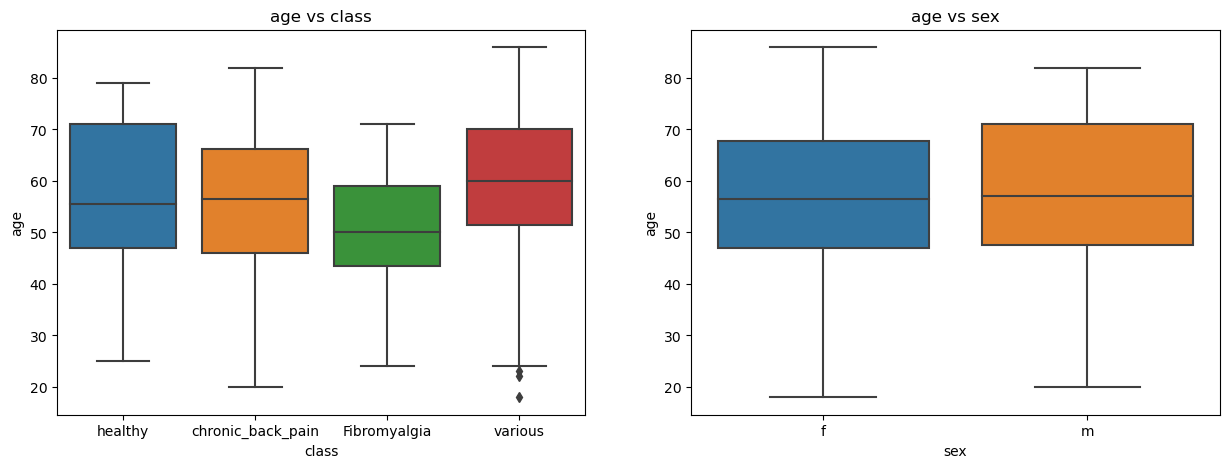

In [39]:
plt.figure(figsize=(15,5))
vars_to_plot = ['class', 'sex']
for i, var in enumerate(vars_to_plot):
    plt.subplot(1,2,i+1)
    sns.boxplot(x=var, y='age', data=df)
    plt.title(f'age vs {var}')

### class vs numerical vars (distribution)

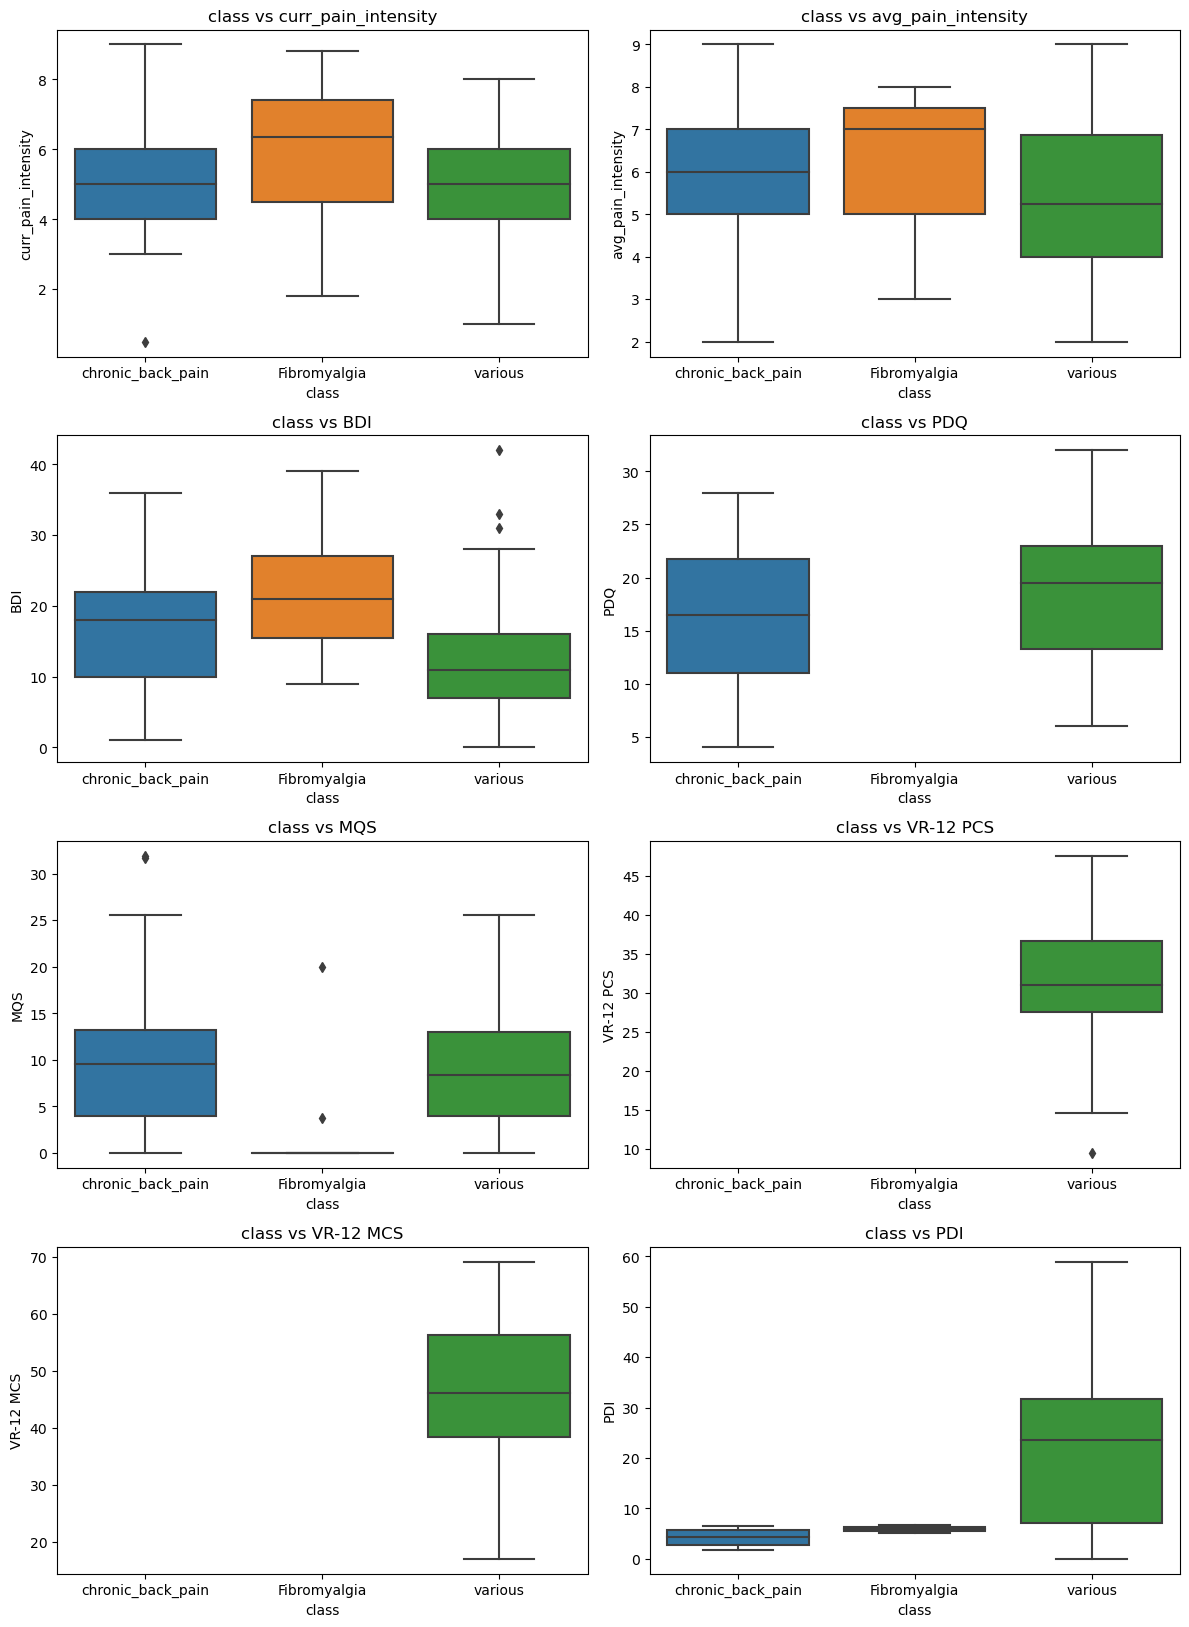

In [40]:
tmp = df[df['class']!='healthy']
plt.figure(figsize=(12,20))
vars_to_plot = ['curr_pain_intensity', 'avg_pain_intensity', 'BDI', 'PDQ', 
                'MQS', 'VR-12 PCS', 'VR-12 MCS', 'PDI']
for i, var in enumerate(vars_to_plot):
    plt.subplot(5,2,i+1)
    sns.boxplot(x='class', y=var, data=tmp)
    #sns.violinplot(x='class', y=var, data=df)
    plt.title(f'class vs {var}')
plt.tight_layout()

### pain intensity vs numerical vars

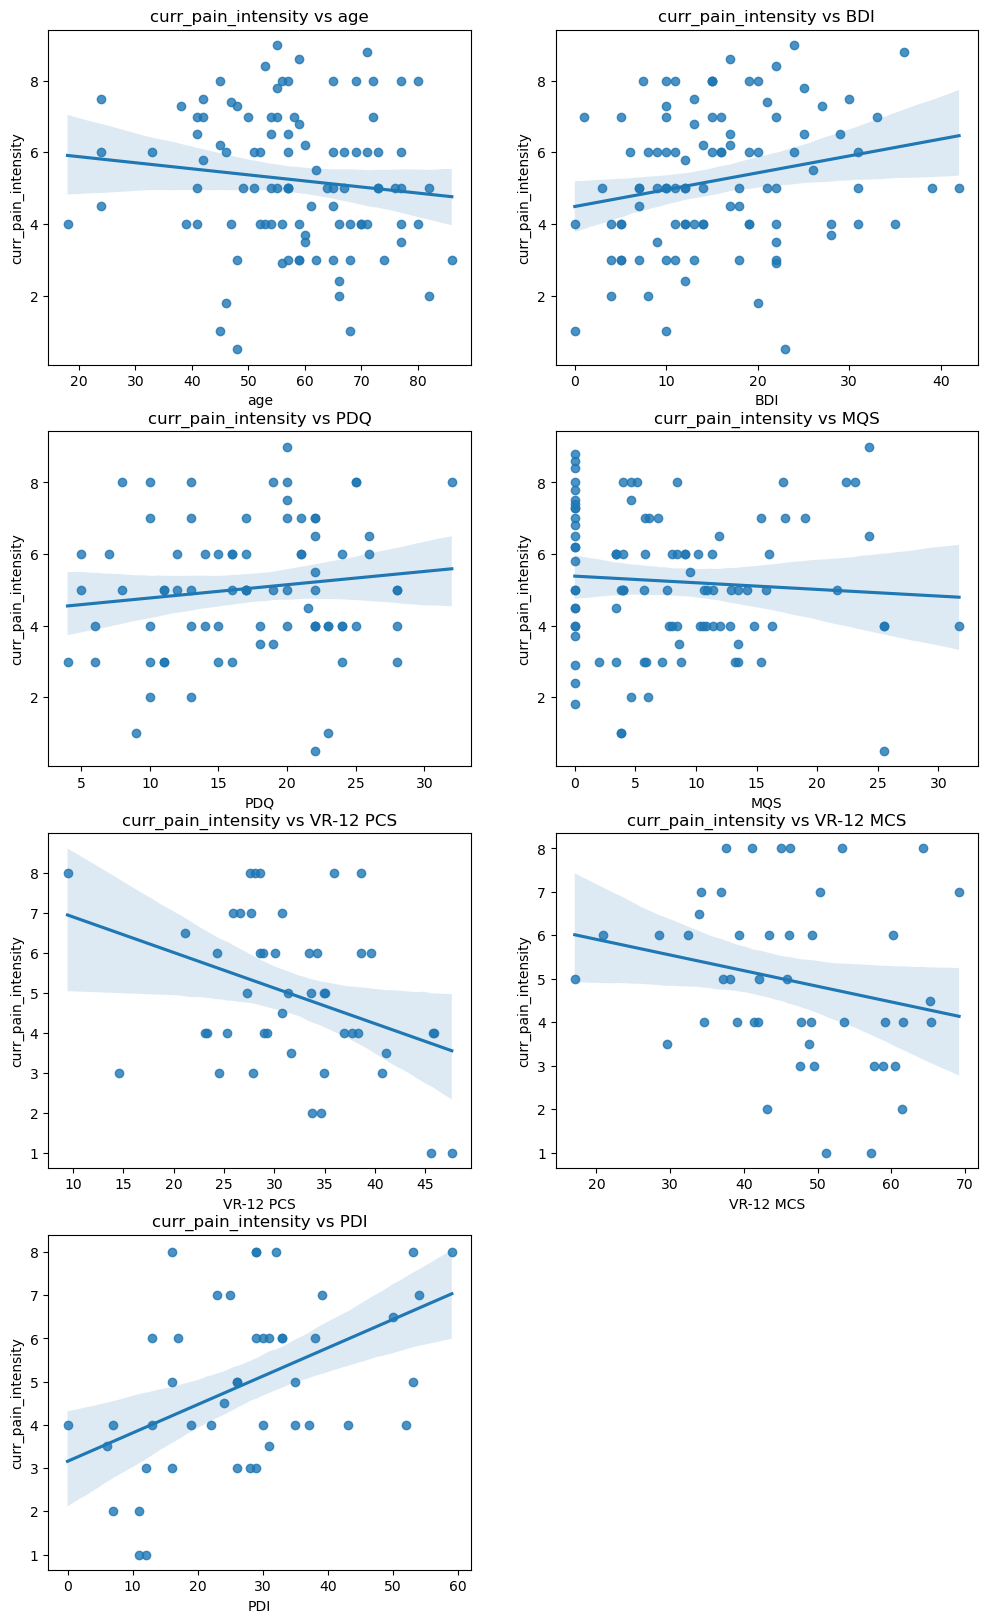

In [41]:
plt.figure(figsize=(12,20))
vars_to_plot = ['age', 'BDI', 'PDQ', 'MQS', 'VR-12 PCS', 'VR-12 MCS', 'PDI']
for i, var in enumerate(vars_to_plot):
    plt.subplot(4,2,i+1)
    sns.regplot(y='curr_pain_intensity', x=var, data=df)
    plt.title(f'curr_pain_intensity vs {var}')

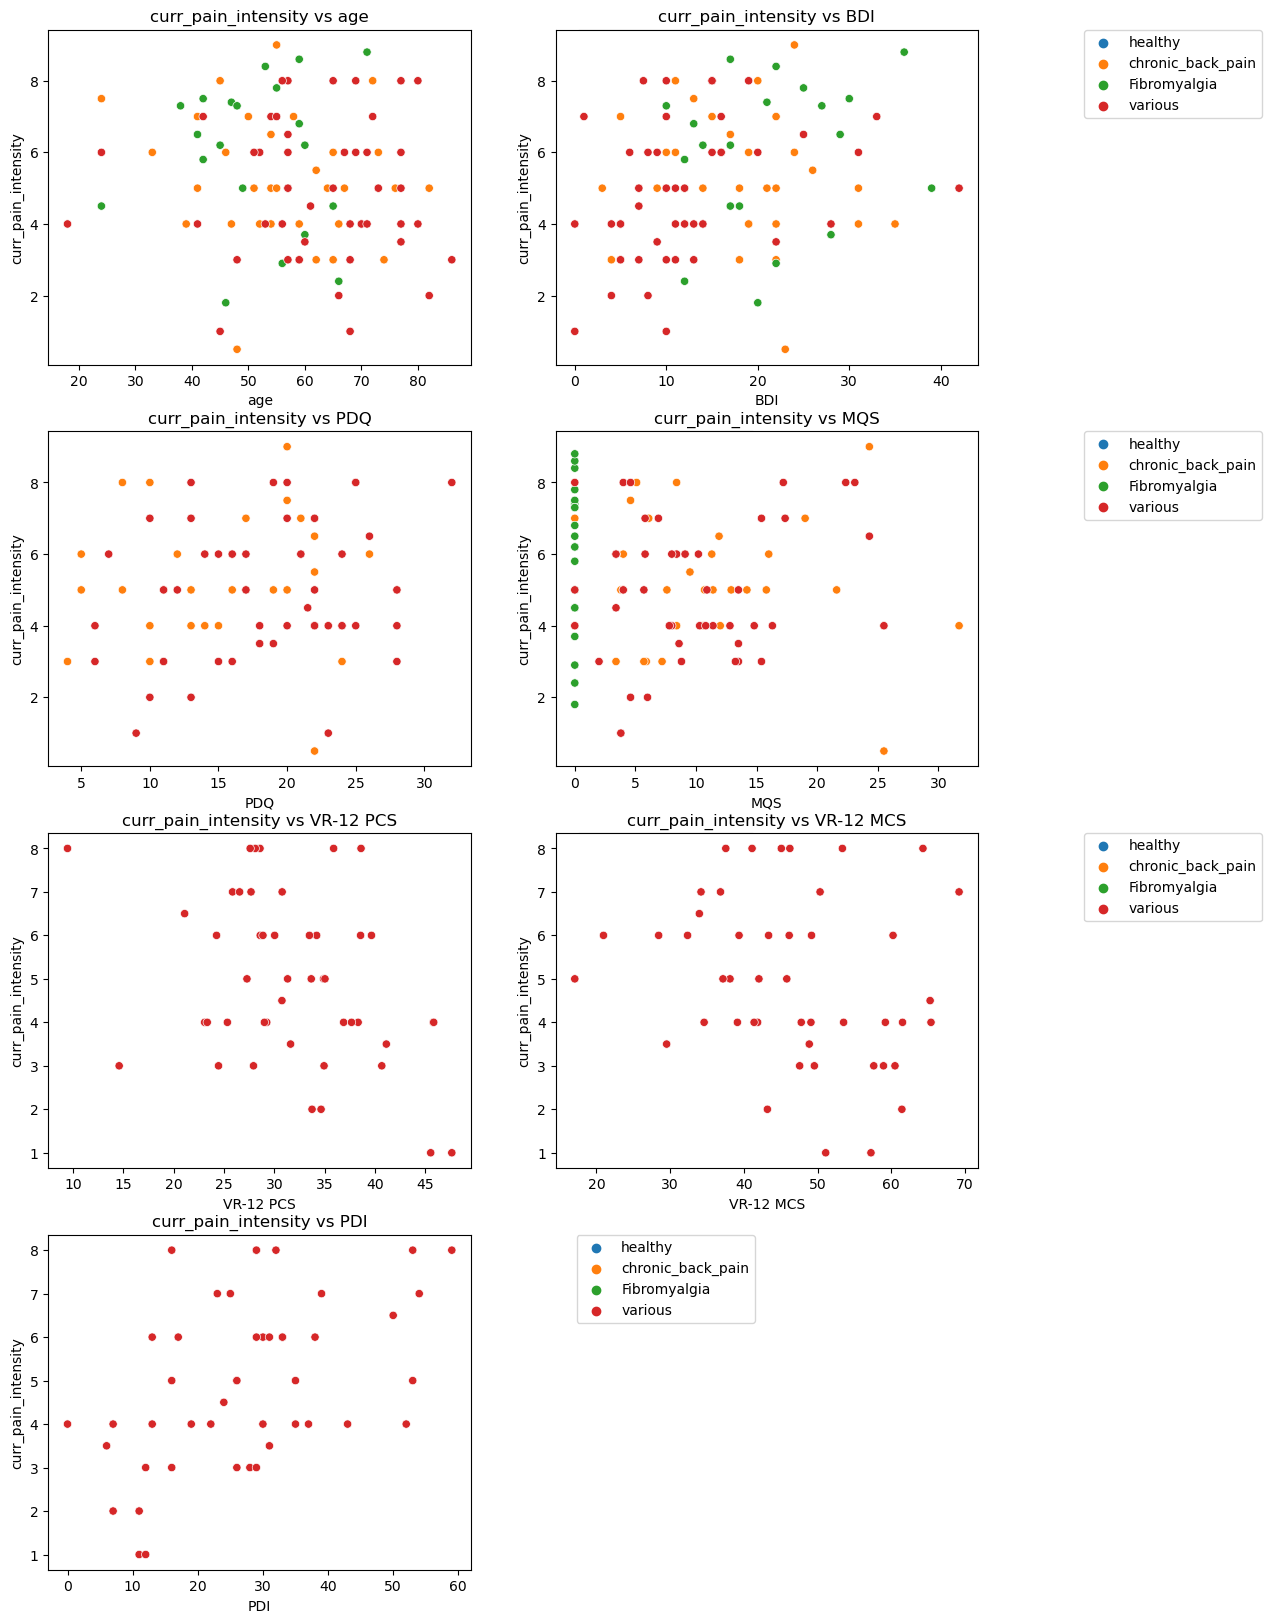

In [42]:
plt.figure(figsize=(12,20))
vars_to_plot = ['age', 'BDI', 'PDQ', 'MQS', 'VR-12 PCS', 'VR-12 MCS', 'PDI']
for i, var in enumerate(vars_to_plot):
    plt.subplot(4,2,i+1)
    sns.scatterplot(y='curr_pain_intensity', x=var, data=df, hue='class')
    plt.legend(bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0, ncol=1)
    plt.title(f'curr_pain_intensity vs {var}')

### correlation

In [43]:
df.head()

,class,label,age,sex,pain_duration,avg_pain_intensity,curr_pain_intensity,BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
0,healthy,0,66,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,healthy,0,36,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,healthy,0,51,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,healthy,0,51,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,healthy,0,25,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
feats

['age',
 'sex',
 'pain_duration',
 'avg_pain_intensity',
 'curr_pain_intensity',
 'BDI',
 'PDQ',
 'MQS',
 'VR-12 PCS',
 'VR-12 MCS',
 'PDI']

In [45]:
correlations = df[feats].corr(numeric_only=True)
correlations

,age,pain_duration,avg_pain_intensity,curr_pain_intensity,BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
age,1.000000,0.212919,0.050382,-0.121311,-0.112846,-0.142655,0.050733,0.265251,0.179469,0.056171
pain_duration,0.212919,1.000000,0.089826,-0.016324,0.073070,-0.083753,0.161816,-0.119387,-0.009913,0.018049
avg_pain_intensity,0.050382,0.089826,1.000000,0.726057,0.276388,0.244687,0.193408,-0.339109,-0.239012,0.309850
curr_pain_intensity,-0.121311,-0.016324,0.726057,1.000000,0.218776,0.130462,-0.072606,-0.361594,-0.224729,0.487473
BDI,-0.112846,0.073070,0.276388,0.218776,1.000000,0.058913,0.070036,-0.351783,-0.730370,0.241985
PDQ,-0.142655,-0.083753,0.244687,0.130462,0.058913,1.000000,0.218659,-0.429826,0.000123,0.431249
MQS,0.050733,0.161816,0.193408,-0.072606,0.070036,0.218659,1.000000,-0.388987,-0.152938,0.249773
VR-12 PCS,0.265251,-0.119387,-0.339109,-0.361594,-0.351783,-0.429826,-0.388987,1.000000,-0.076970,-0.588214
VR-12 MCS,0.179469,-0.009913,-0.239012,-0.224729,-0.730370,0.000123,-0.152938,-0.076970,1.000000,-0.446293
PDI,0.056171,0.018049,0.309850,0.487473,0.241985,0.431249,0.249773,-0.588214,-0.446293,1.000000


In [46]:
correlations['curr_pain_intensity'].sort_values(ascending=False)

curr_pain_intensity    1.000000
avg_pain_intensity     0.726057
PDI                    0.487473
BDI                    0.218776
PDQ                    0.130462
pain_duration         -0.016324
MQS                   -0.072606
age                   -0.121311
VR-12 MCS             -0.224729
VR-12 PCS             -0.361594
Name: curr_pain_intensity, dtype: float64

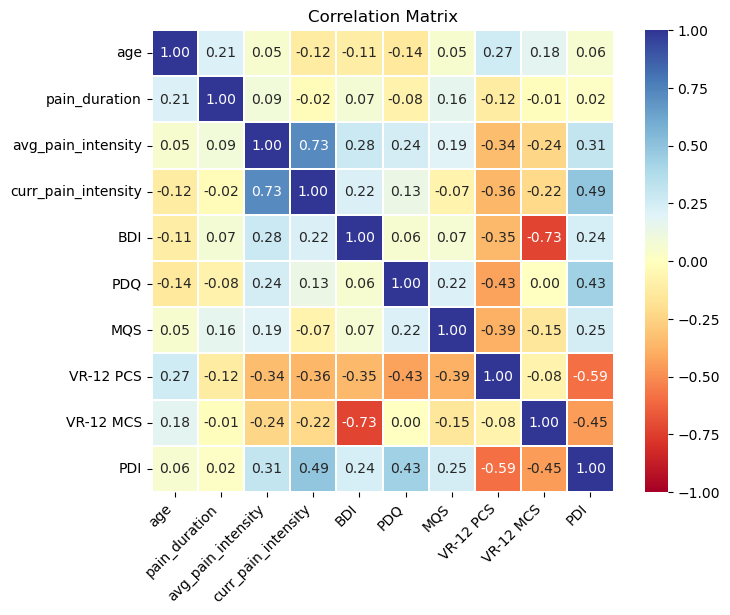

In [47]:
plt.figure(figsize=(8, 6))
fig = sns.heatmap(
    df[feats].corr(numeric_only=True), 
    vmin=-1, vmax=1, center=0,
    annot=True, 
    linewidths=0.05, 
    fmt= '.2f', 
    cmap='RdYlBu',
    square=True
)
fig.set_xticklabels(
    fig.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('Correlation Matrix')
plt.show()

avg_pain_intensity vs curr_pain_intensity = 0.73  
curr_pain_intensity vs PDI = 0.49  
BDI - VR-12 MCS = -0.73  
PDQ - VR-12 PCS = -0.43  
PDQ - PDI = 0.43  
PDI - VR-12 PCS = -0.59  
PDI - PDQ = 0.43  
PDI - VR-12 MCS = -0.45

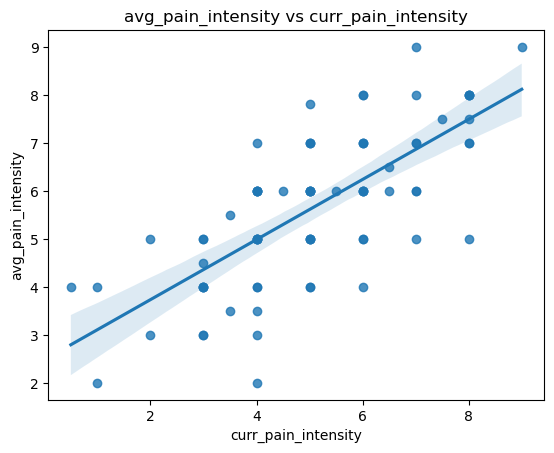

In [48]:
sns.regplot(y='avg_pain_intensity', x='curr_pain_intensity', data=df)
plt.title('avg_pain_intensity vs curr_pain_intensity')
plt.show()

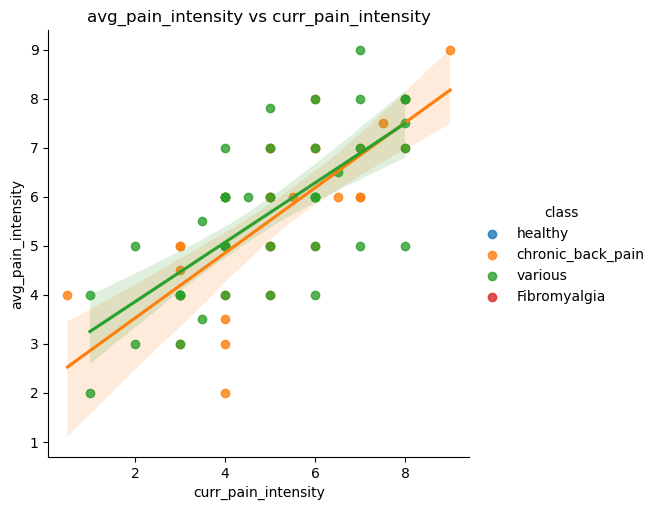

In [49]:
sns.lmplot(y='avg_pain_intensity', x='curr_pain_intensity', 
           hue='class', 
           hue_order=list(df['class'].value_counts().index),
           data=df)
plt.title('avg_pain_intensity vs curr_pain_intensity')
plt.show()

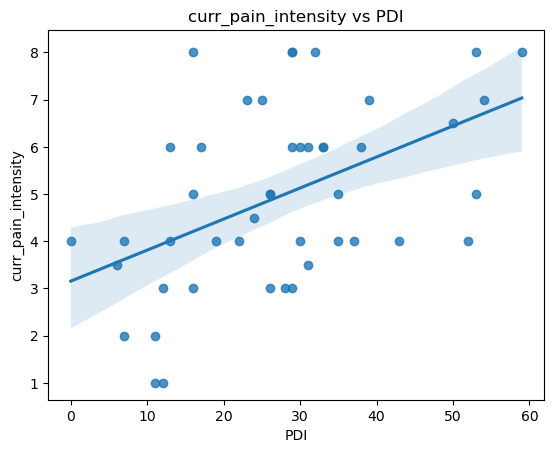

In [50]:
sns.regplot(y='curr_pain_intensity', x='PDI', data=df)
plt.title('curr_pain_intensity vs PDI')
plt.show()

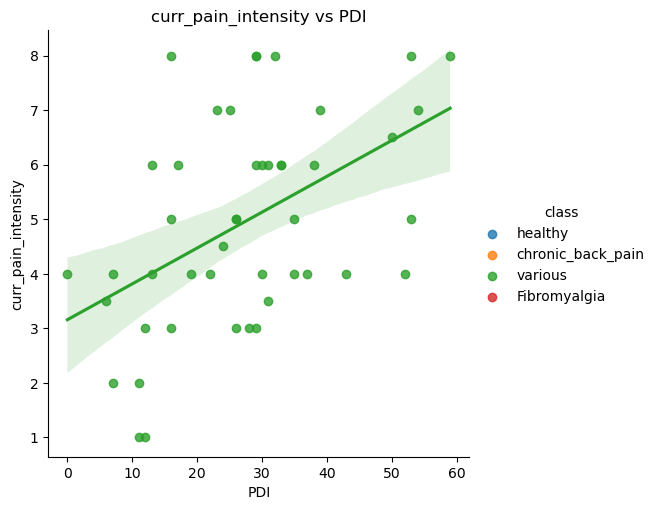

In [51]:
sns.lmplot(y='curr_pain_intensity', x='PDI', 
           hue='class',
           hue_order=list(df['class'].value_counts().index),
          data=df)
plt.title('curr_pain_intensity vs PDI')
plt.show()

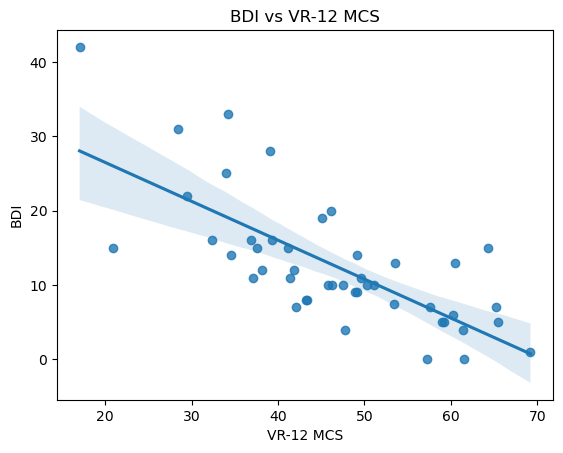

In [52]:
sns.regplot(y='BDI', x='VR-12 MCS', data=df)
plt.title('BDI vs VR-12 MCS')
plt.show()

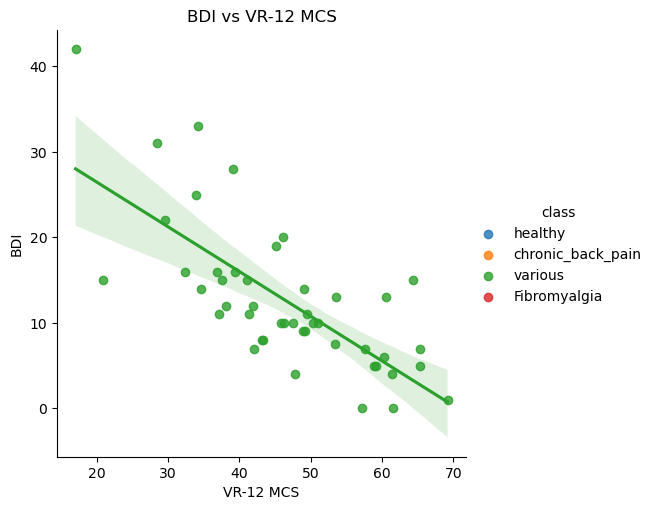

In [53]:
sns.lmplot(y='BDI', x='VR-12 MCS', 
           hue='class', 
           hue_order=list(df['class'].value_counts().index),
           data=df)
plt.title('BDI vs VR-12 MCS')
plt.show()

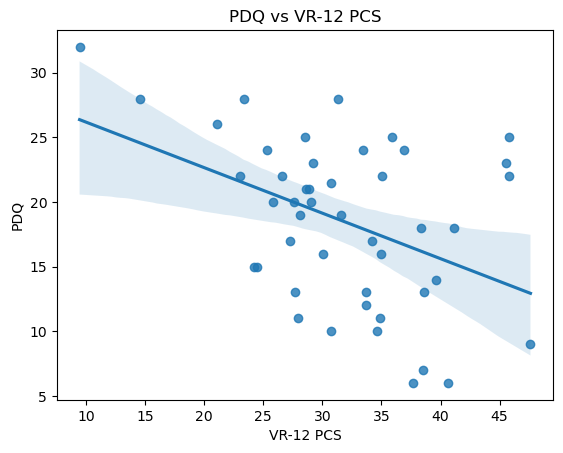

In [54]:
#PDQ - VR-12 PCS = -0.43
#PDQ - PDI = 0.43
sns.regplot(y='PDQ', x='VR-12 PCS', data=df)
plt.title('PDQ vs VR-12 PCS')
plt.show()

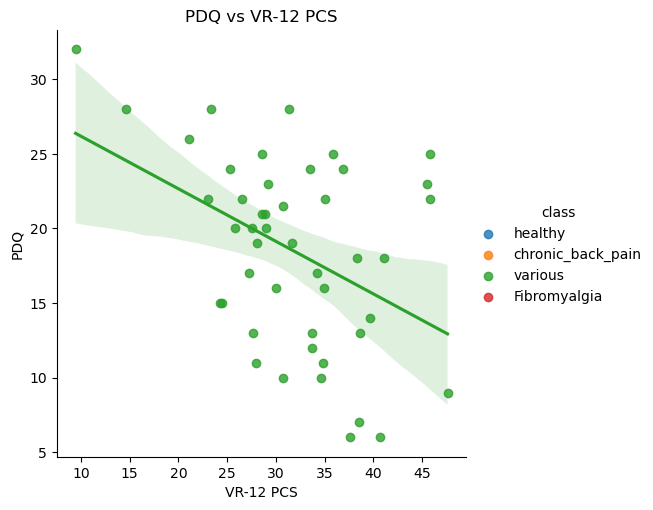

In [55]:
sns.lmplot(y='PDQ', x='VR-12 PCS', 
           hue='class', 
           hue_order=list(df['class'].value_counts().index),
           data=df)
plt.title('PDQ vs VR-12 PCS')
plt.show()

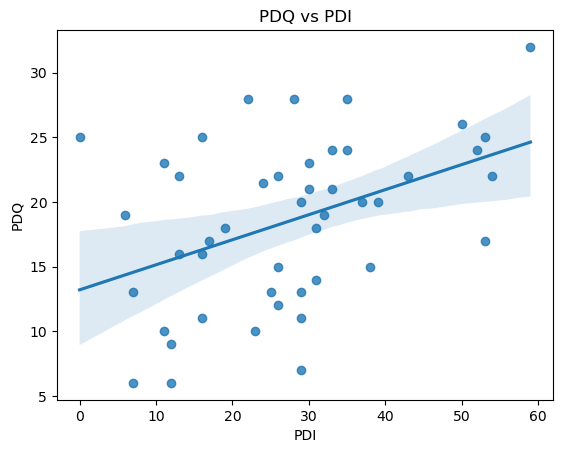

In [56]:
#PDQ - VR-12 PCS = -0.43
#PDQ - PDI = 0.43
sns.regplot(y='PDQ', x='PDI', data=df)
plt.title('PDQ vs PDI')
plt.show()

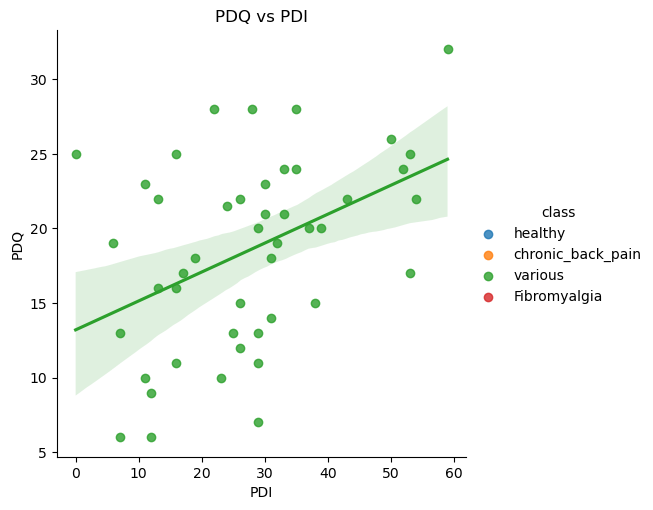

In [57]:
sns.lmplot(y='PDQ', x='PDI', data=df, hue='class', hue_order=list(df['class'].value_counts().index))
plt.title('PDQ vs PDI')
plt.show()

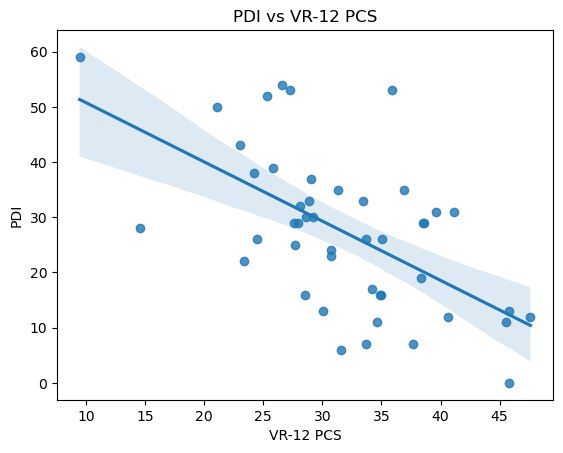

In [58]:
sns.regplot(y='PDI', x='VR-12 PCS', data=df)
plt.title('PDI vs VR-12 PCS')
plt.show()

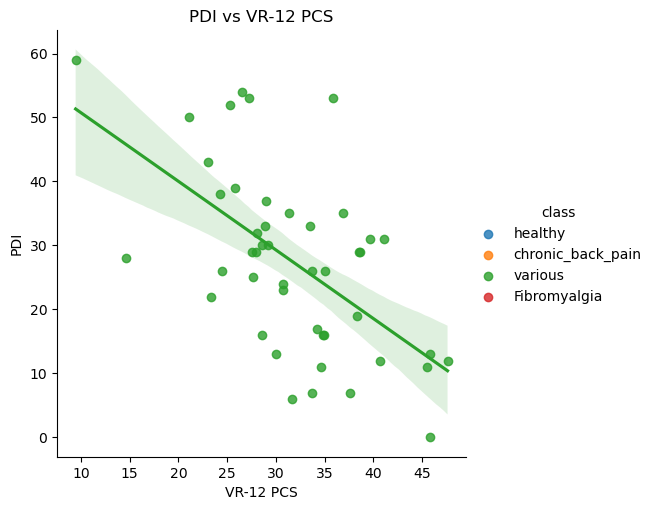

In [59]:
sns.lmplot(y='PDI', x='VR-12 PCS', data=df, hue='class', hue_order=list(df['class'].value_counts().index))
plt.title('PDI vs VR-12 PCS')
plt.show()

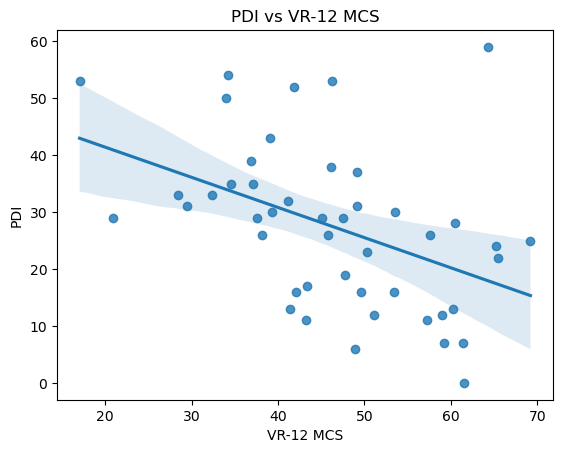

In [60]:
#PDI - VR-12 PCS = -0.59  
#PDI - PDQ = 0.43  
#PDI - VR-12 MCS = -0.45
sns.regplot(y='PDI', x='VR-12 MCS', data=df)
plt.title('PDI vs VR-12 MCS')
plt.show()

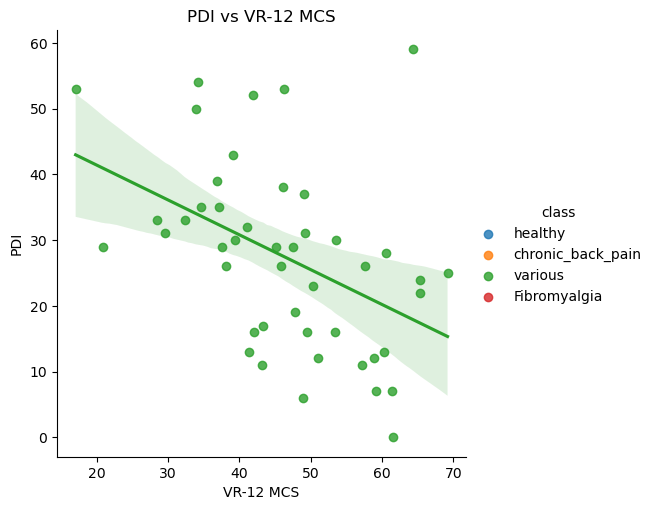

In [61]:
sns.lmplot(y='PDI', x='VR-12 MCS', data=df, hue='class', hue_order=list(df['class'].value_counts().index))
plt.title('PDI vs VR-12 MCS')
plt.show()

In [62]:
df[feats].corr(numeric_only=True)

,age,pain_duration,avg_pain_intensity,curr_pain_intensity,BDI,PDQ,MQS,VR-12 PCS,VR-12 MCS,PDI
age,1.000000,0.212919,0.050382,-0.121311,-0.112846,-0.142655,0.050733,0.265251,0.179469,0.056171
pain_duration,0.212919,1.000000,0.089826,-0.016324,0.073070,-0.083753,0.161816,-0.119387,-0.009913,0.018049
avg_pain_intensity,0.050382,0.089826,1.000000,0.726057,0.276388,0.244687,0.193408,-0.339109,-0.239012,0.309850
curr_pain_intensity,-0.121311,-0.016324,0.726057,1.000000,0.218776,0.130462,-0.072606,-0.361594,-0.224729,0.487473
BDI,-0.112846,0.073070,0.276388,0.218776,1.000000,0.058913,0.070036,-0.351783,-0.730370,0.241985
PDQ,-0.142655,-0.083753,0.244687,0.130462,0.058913,1.000000,0.218659,-0.429826,0.000123,0.431249
MQS,0.050733,0.161816,0.193408,-0.072606,0.070036,0.218659,1.000000,-0.388987,-0.152938,0.249773
VR-12 PCS,0.265251,-0.119387,-0.339109,-0.361594,-0.351783,-0.429826,-0.388987,1.000000,-0.076970,-0.588214
VR-12 MCS,0.179469,-0.009913,-0.239012,-0.224729,-0.730370,0.000123,-0.152938,-0.076970,1.000000,-0.446293
PDI,0.056171,0.018049,0.309850,0.487473,0.241985,0.431249,0.249773,-0.588214,-0.446293,1.000000
